----

# Patrones que predicen el éxito de videojuegos

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Diccionario de datos](#data)
* [Exploración y preprocesamiento de datos](#pre)
* [Análisis de datos](#Analisis)
* [Análisis por región](#Región)
* [Prueba de hipotesis](#Hipotesis)
* [Conclusiones](#coclusión)

## Introducción <a id='intro'></a>

El objetivo es identificar patrones clave que determinen el éxito de los videojuegos. La información a disposición incluye reseñas de usuarios y expertos, géneros de juegos, plataformas como Xbox y PlayStation, así como datos históricos sobre las ventas. Estos datos, que abarcan desde 2016, son esenciales para predecir el rendimiento futuro de los juegos.

En este contexto, supongamos que estamos en diciembre de 2016 y que se está preparando una campaña para el año 2017. Se analizaron los datos disponibles para detectar qué factores influyen en el éxito de un juego, lo cual es crucial para identificar proyectos prometedores y planificar estrategias publicitarias efectivas.

Aunque el periodo de análisis específico es 2016 para prever 2017, la habilidad que adquirirás en la interpretación y análisis de datos es igualmente valiosa si estuvieras pronosticando las ventas de 2027 basándote en los datos de 2026. La experiencia en el manejo de datos y en la identificación de patrones clave es fundamental para tomar decisiones informadas y estratégicas, independientemente del horizonte temporal.

## Diccionario de datos <a id='dic_data'></a>



El dataset contiene datos que se remontan a 2016, que proporcionan datos importantes de videojuegos.
Descripción de datos:

-Name (Nombre)

-Platform (Plataforma)

-Year_of_Release: Año de lanzamiento del juego

-Genre (Género) 

-NA_sales: ventas en Norteamérica en millones de dólares estadounidenses 

-EU_sales: ventas en Europa en millones de dólares estadounidenses 

-JP_sales: ventas en Japón en millones de dólares estadounidenses 

-Other_sales: ventas en otros países en millones de dólares estadounidenses 

-Critic_Score (máximo de 100) 

-User_Score (máximo de 10) 

-Rating (ESRB)

## Preprocesamiento de datos<a id='pre'></a>
Primero, se evaluará la calidad de los datos y si los problemas presentes son significativos. Entonces, durante el preprocesamiento de datos, se tomaran las medidas necesarias para resolver cualquier problema.

El objetivo de este apartado es la exploración, modificación y corrección de los datos del data frame para posteriormente analizar los datos. 

In [55]:
import pandas as pd 
import numpy as np
games_df = pd.read_csv('/datasets/games.csv')

In [56]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Al ver nuestros datos a simple vista se haran cambios, los cuales incluyen el nombre de las columnas (unicamente manejaremos mínusculas), así como el formato de tipo en las columnas 'Year_of_Release' y'User_Score'. 



In [57]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [58]:
games_df.columns= games_df.columns.str.lower()

In [59]:
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [60]:
games_df['year_of_release'] = games_df['year_of_release']. fillna(0).astype('int')

In [61]:
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


Para el caso de la columna 'Year_of_Release', nuestro formato original estaba como número flotante, lo cual no es necesario, no sirve tener decimales en esta columna, por lo que se convirtieron a números enteros. 
Al intenar realizar esto, no se logro debido a las filas con información ausente, los cuales se rellenaran con 0, a razon que no conocemos en que año pudo haber salido realmente el juego.

In [62]:
games_df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [63]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

In [64]:
games_df['user_score'] = games_df['user_score'].astype('float')

Para el caso de la columna 'user_score', nuestro formato original estaba como objeto, pero al ver la tabla se podia observar que contenía números decimales, por lo que se realizó un cambio del formato a tipo float. 
Al intenar realizar esto, no se logro debido a las filas con información rellenada con tbd que significa el el juego aún no tiene score, por lo que se sustituyo con nan.

In [65]:
nulos_totales = games_df.isna().sum()
print(nulos_totales)

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [66]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [67]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)

In [68]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Por utlimo, se realizo un enrequecimiento de datos con la creación de una nueva columna; **total_sales**. Esta columna sumo el total de ventas por región. 

## Análisis de datos <a id='Analisis'></a>

In [69]:
analisis_de_juegos_por_año = games_df.groupby('year_of_release')['name'].count().sort_values(ascending = False).reset_index()

In [70]:
analisis_de_juegos_por_año= analisis_de_juegos_por_año[analisis_de_juegos_por_año['year_of_release'] != 0]

<AxesSubplot:xlabel='year_of_release'>

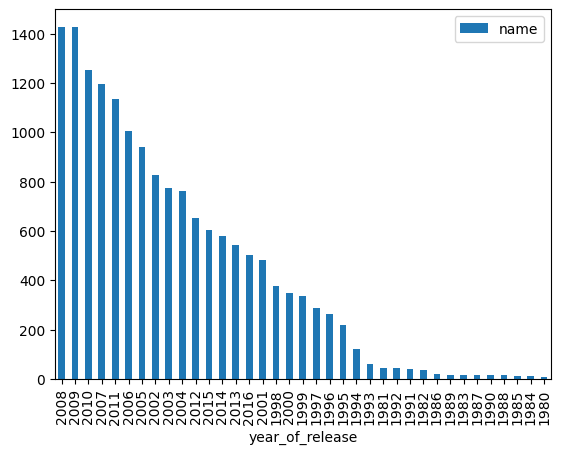

In [71]:
import matplotlib.pyplot as plt 

analisis_de_juegos_por_año.plot( x= 'year_of_release', kind= 'bar')

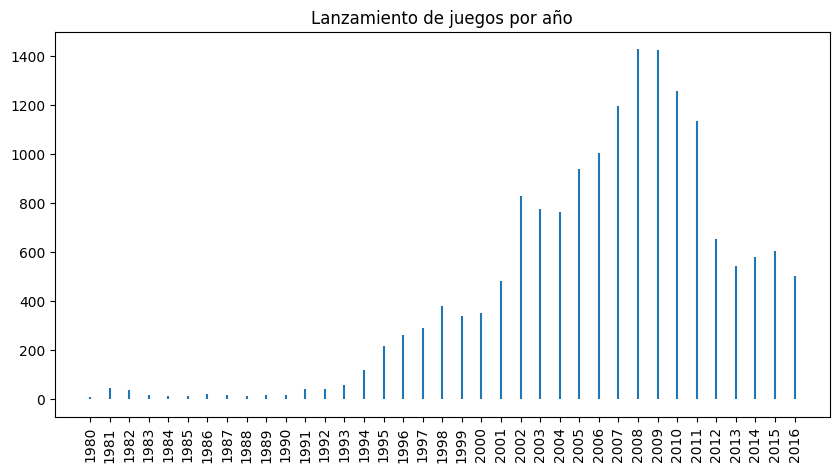

In [72]:
fig, ax = plt.subplots(figsize = (10,5))
ax.vlines (x= analisis_de_juegos_por_año.year_of_release, ymin = 0, ymax = analisis_de_juegos_por_año.name)
ax.set_title('Lanzamiento de juegos por año')
ax.set_xticks(analisis_de_juegos_por_año.year_of_release)
ax.set_xticklabels(analisis_de_juegos_por_año.year_of_release, rotation =90)
plt.show()


Los años en el que más juegos fueros lanzados estan entre el 2008 y 2009, mientras que en 1980, es el periodo donde menos se sacaron juegos.

In [73]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [74]:
ventas_plataforma_df = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

In [75]:
ventas_plataforma_df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [76]:
ventas_plataforma_df['z_score'] = (ventas_plataforma_df['total_sales'] - ventas_plataforma_df['total_sales'].mean())/ventas_plataforma_df['total_sales'].std()

In [77]:
ventas_plataforma_df

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [78]:
ventas_plataforma_df['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in ventas_plataforma_df['z_score']]

In [79]:
ventas_plataforma_df

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


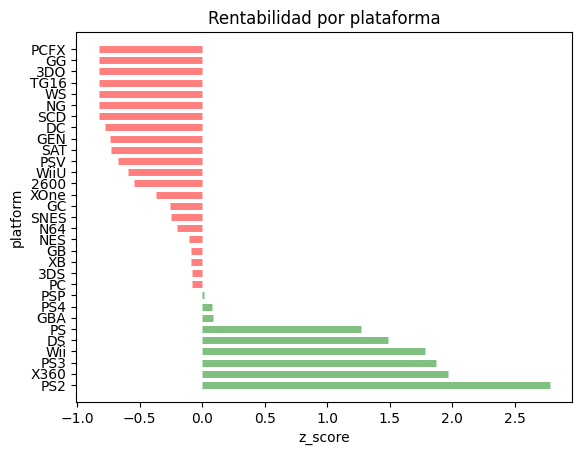

In [80]:
plt.figure()
plt.hlines(
    y= ventas_plataforma_df.platform, xmin = 0, xmax = ventas_plataforma_df.z_score, color = ventas_plataforma_df.color, linewidth = 5, alpha = 0.5
)
plt.ylabel ('platform')
plt.xlabel ('z_score')
plt.title ('Rentabilidad por plataforma')
plt.show()

Las plataformas en color **Verde** son rentables, hasta la plataforma PC es rentable, ya que no estan alejados de la media,  las demás plataformas son menos rentables.
Parece que las plataformas más rentables son PS2, X360 y PS3, mientras que las menos rentables son PCFX, GG, 3DO. 

In [81]:
games_df['year_of_release'].nunique()

38

In [82]:
games_df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

Podemos ver que tenemos lanzamientos de juegos de bastantas años, para ser especificos 38!
Para este análisis se considera hacer una campaña del 2017, los gustos han cambiado desde 1980. 
Para entender las tendencias recientes y el comportamiento del consumidor, se analizan los datos de los últimos 1 a 3 años. Esto ayuda a captar cambios en el mercado y en las preferencias de los jugadores.

Por lo que se filtraran los datos tomando en cuenta los ultimos 3 años de información que hay, siendo el 2013 - 2016 los años de refenrecia.

In [83]:
games_clean_df = games_df.query('year_of_release >= 2013')

In [84]:
games_clean_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [85]:
tiempo_vida_df = pd.pivot_table(games_clean_df, index = 'year_of_release', columns='platform', values='total_sales', aggfunc = 'sum').fillna(0)

In [86]:
tiempo_vida_df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [87]:
import seaborn as sns

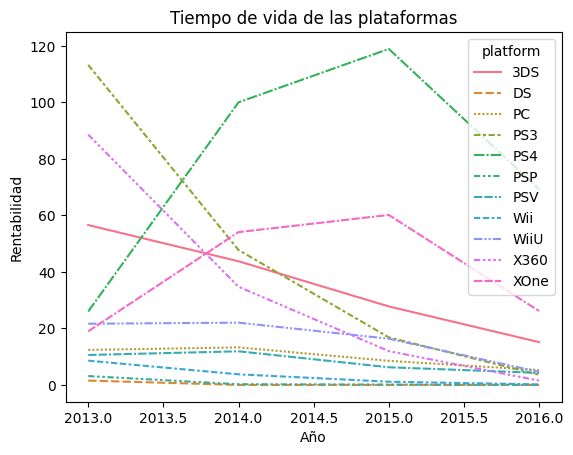

In [88]:
sns.lineplot(data= tiempo_vida_df)
plt.ylabel('Rentabilidad')
plt.xlabel('Año')
plt.title('Tiempo de vida de las plataformas')
plt.show()

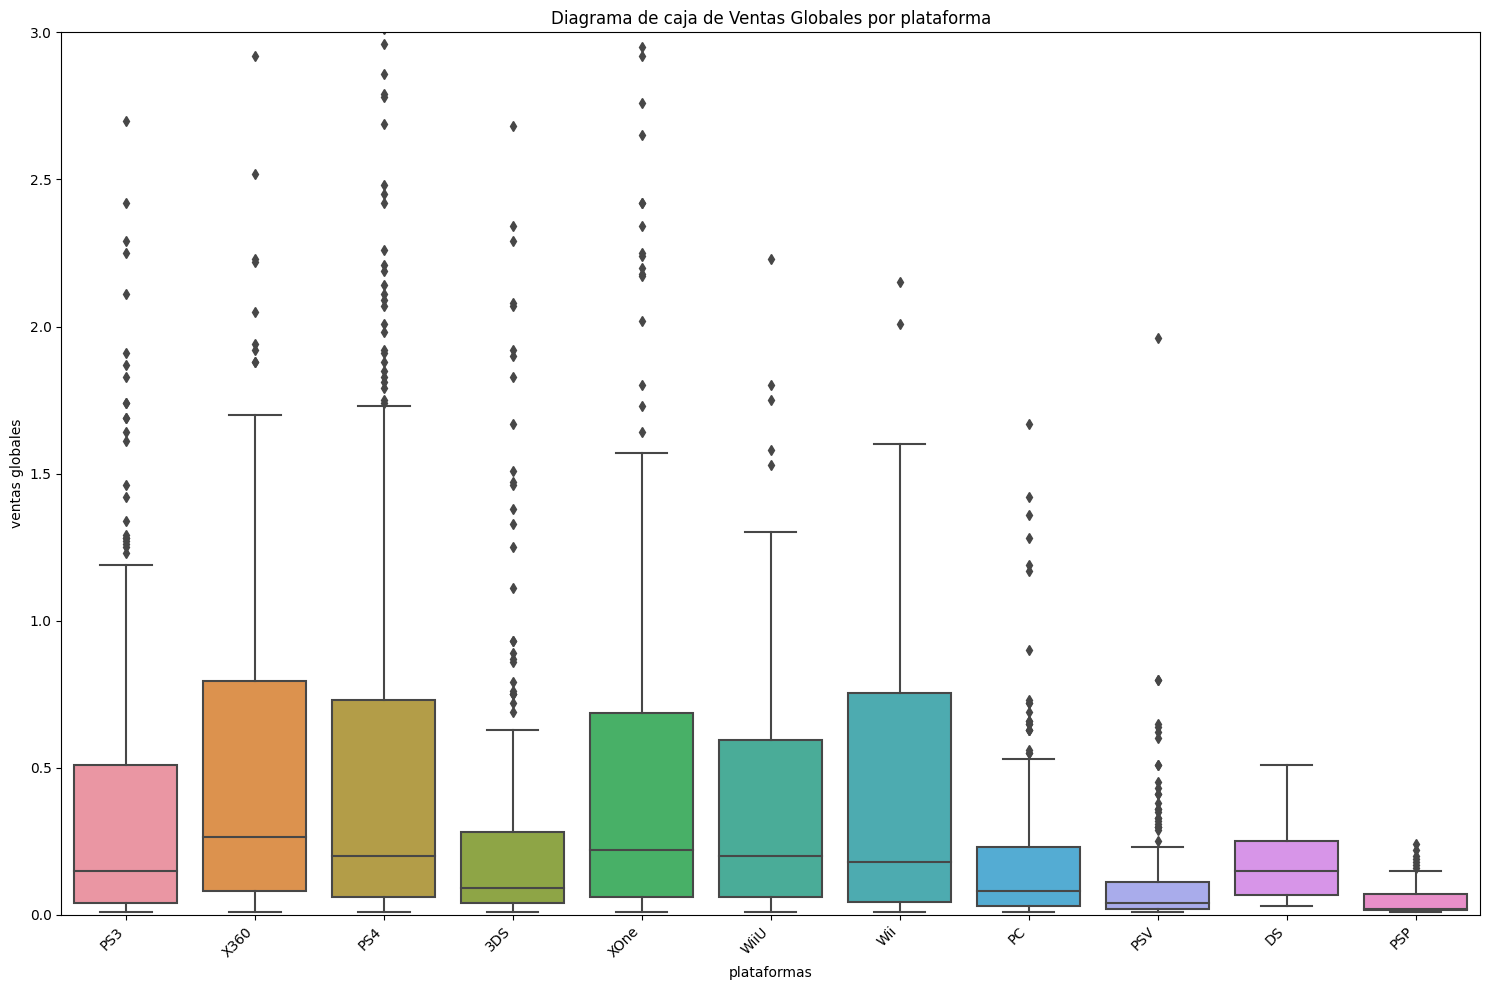

In [89]:
plt.figure(figsize=(15, 10))
ax= sns.boxplot ( x= 'platform', y= 'total_sales', data = games_clean_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0, 3) 
plt.xlabel ('plataformas')
plt.ylabel('ventas globales')
plt.title('Diagrama de caja de Ventas Globales por plataforma')

plt.tight_layout()
plt.show()

Las plataformas con cajas más grandes y amplias indican una mayor variabilidad en las ventas.
Las medias nos indican cuales son las plataformas con más ventas. 

x360 es una plataforma en la que en su caja tiene una mediana alta, so que significa que en promedio, los juegos de esta plataforma se suelen vender más.

 Algunas plataformas pueden tener una alta variabilidad en ventas, lo que sugiere que algunos juegos pueden tener ventas muy altas o bajas en comparación con otros juegos en la misma plataforma. 

Los valores atipicos, nos indican que algun juego no siguen la tendencia en vetas de su plataforma.

In [90]:
platform_df = games_clean_df[games_clean_df['platform'] == '3DS']

In [91]:
platform_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


user score vs. total_sales

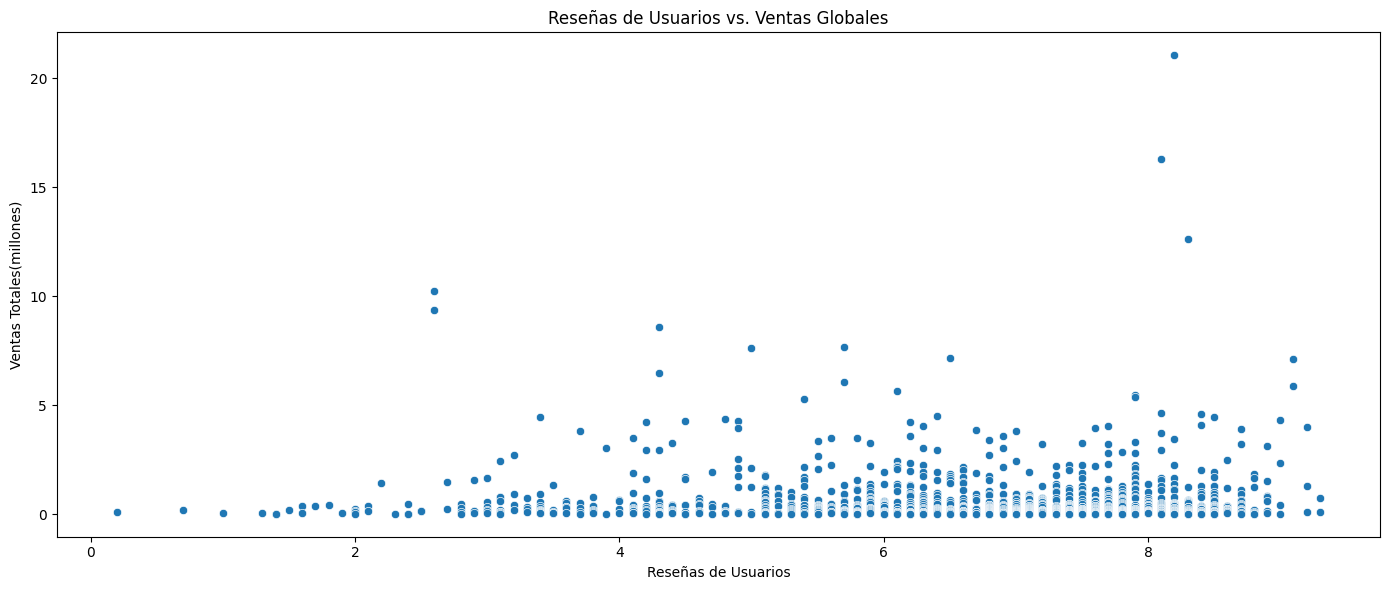

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


plt.figure(figsize=(14, 6))

# Gráfico de dispersión para reseñas de usuarios vs. ventas globales

sns.scatterplot(x='user_score', y='total_sales', data= games_clean_df)
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales(millones)')
plt.title('Reseñas de Usuarios vs. Ventas Globales')

plt.tight_layout()
plt.show()


In [93]:
correlacion_user_sales = games_clean_df['user_score'].corr(games_clean_df['total_sales'])
print(f'Correlación entre reseñas de usuarios y ventas totales: {correlacion_user_sales:.4f}')

Correlación entre reseñas de usuarios y ventas totales: -0.0026


Como se puede observar el grafico así como la correlación no hay una correlación clara entre la calificación de los usuarios y las ventas totales.

Critic_score VS total_sales

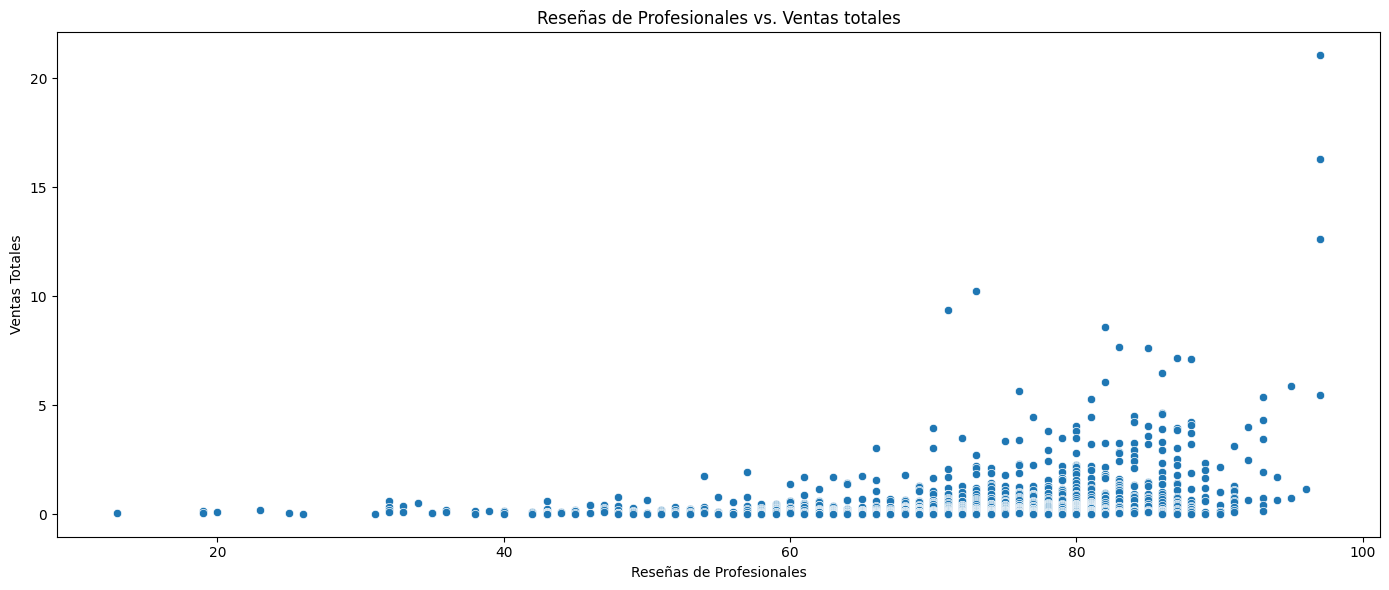

In [94]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=games_clean_df)
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales')
plt.title('Reseñas de Profesionales vs. Ventas totales')

plt.tight_layout()
plt.show()

In [95]:
correlacion_critic_sales = games_clean_df['critic_score'].corr(games_clean_df['total_sales'])
print(f'Correlación entre reseñas de criticos y ventas totales: {correlacion_critic_sales:.4f}')

Correlación entre reseñas de criticos y ventas totales: 0.3137


Nuestra correlación es positiva, por lo que a medida de que la calificación de la critica aumente, aumentaran las ventas, pero es importante destacar que no es una correlaaciópn muy fuerte.

In [96]:
df_comparison = games_clean_df[games_clean_df['name'].isin(platform_df['name'])]

In [97]:
df_comparison

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16631,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


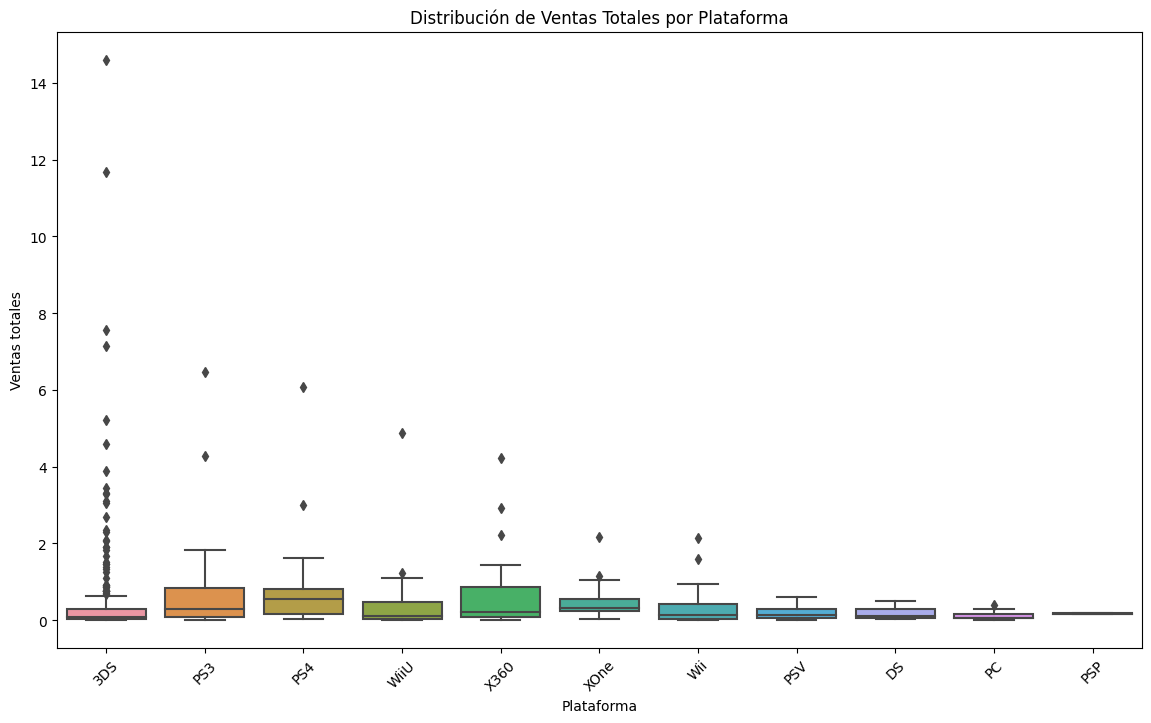

In [98]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_comparison, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

In [173]:
top_8_games = df_comparison[df_comparison['name'].isin(['Pokemon X/Pokemon Y', 'FIFA 14', 'Mushi Bugyou','Ben 10 Omniverse 2','Pokemon Sun/Moon','The Amazing Spider-Man 2 (2014)', 'Aikatsu Stars! My Special Appeal'])]

In [174]:
top_8_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16
3650,The Amazing Spider-Man 2 (2014),PS4,2014,Action,0.20,0.25,0.02,0.09,NaN,NaN,NaN,0.56
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38


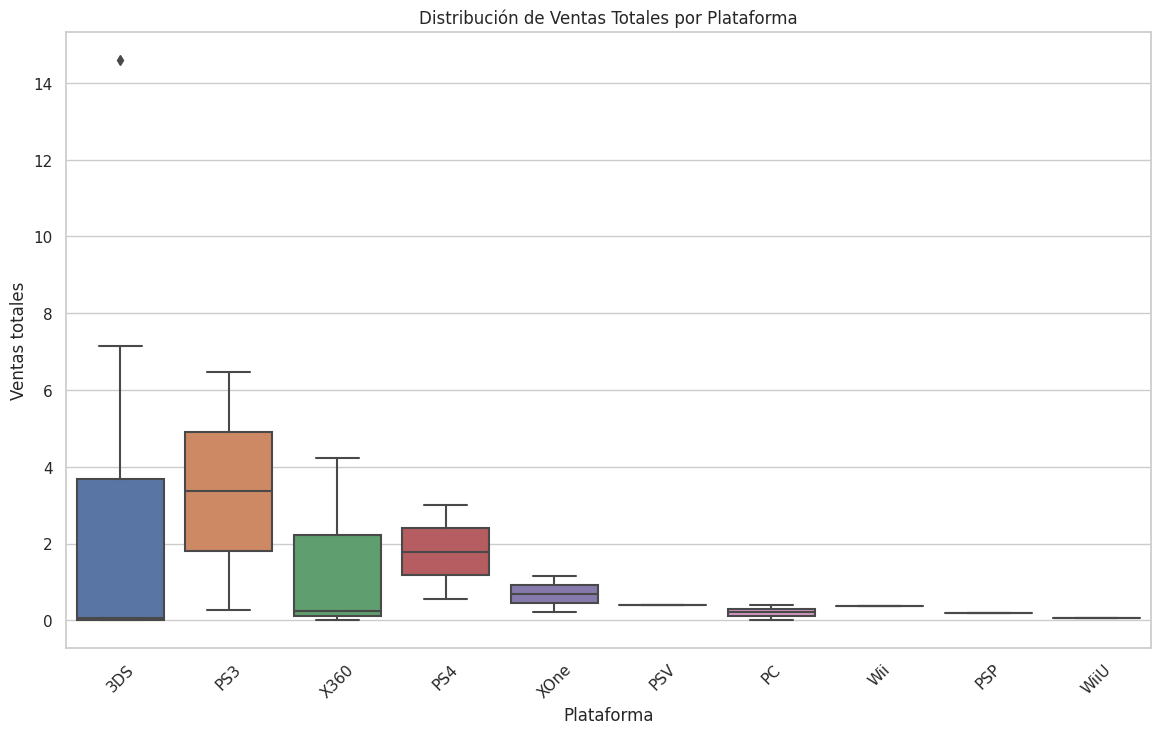

In [178]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data= top_8_games, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

Teniendo en cuenta de que la garáfica anterior es de todos los juegos 3DS que se encuentren en otras plataformas, podemos ver que a pesar de que se encuentre en la plataforma 3DS, algunas ventas son mucho mayores en otras plataformas como lo son la PS3, PS4, X360, XOne.

In [99]:
genre_df = games_clean_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

In [100]:
genre_df 

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


In [101]:
genre_df['score'] = (genre_df['total_sales'] - genre_df['total_sales'].mean())/genre_df['total_sales'].std()

In [102]:
genre_df['color'] = ['red' if ventas < 0 else 'green' for ventas in genre_df['score']]

In [103]:
genre_df

,genre,total_sales,score,color
0,Action,321.87,2.284275,green
1,Shooter,232.98,1.405195,green
2,Sports,150.65,0.590990,green
3,Role-Playing,145.89,0.543916,green
4,Misc,62.82,-0.277607,red
5,Platform,42.63,-0.477277,red
6,Racing,39.89,-0.504374,red
7,Fighting,35.31,-0.549668,red
8,Adventure,23.64,-0.665079,red
9,Simulation,21.76,-0.683671,red


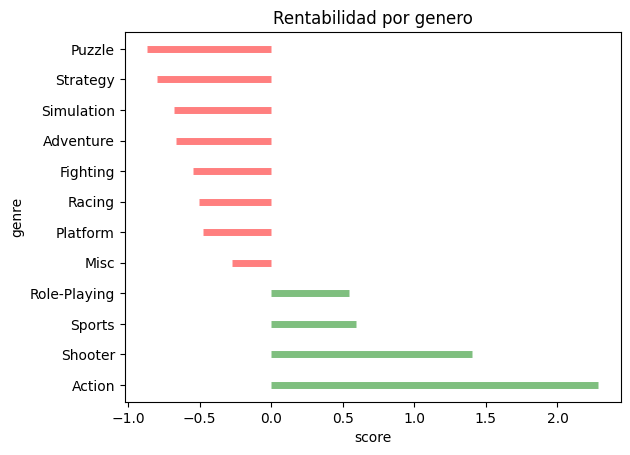

In [104]:
plt.figure()
plt.hlines(
    y= genre_df.genre, xmin = 0, xmax = genre_df.score, color = genre_df.color, linewidth = 5, alpha = 0.5
)
plt.ylabel ('genre')
plt.xlabel ('score')
plt.title ('Rentabilidad por genero')
plt.show()

A pesar de que el genero Misc, genera bastante dinero, no parece ser de los juegos más rentables, como en el caso de Role-Playing. 

## Análisis por región <a id='Región'></a>

### Región Norteaméricana (NA)

In [105]:
games_clean_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [106]:
na_df = games_clean_df[['name','platform','year_of_release', 'genre','na_sales', 'rating']]

In [107]:
na_df

,name,platform,year_of_release,genre,na_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,M
23,Grand Theft Auto V,X360,2013,Action,9.66,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,M
...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN


In [108]:
na_plataforma_df = na_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [109]:
na_plataforma_df.head(5)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


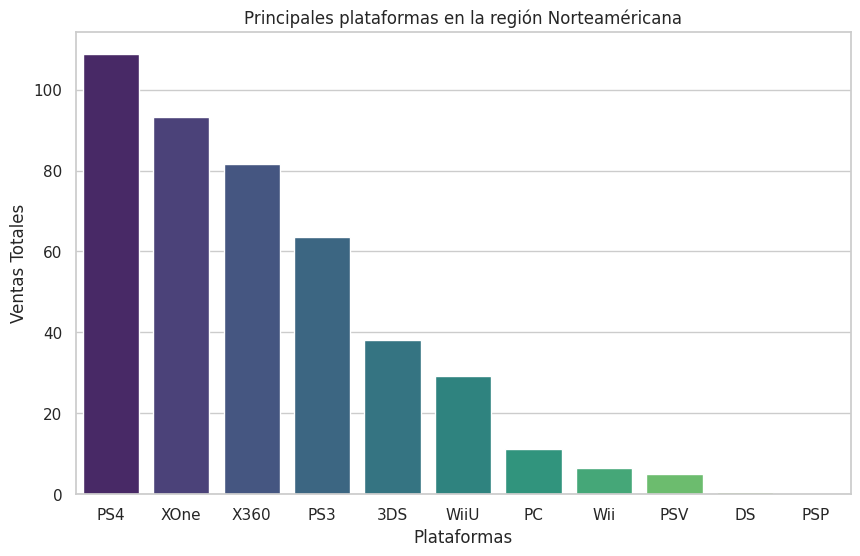

In [110]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='na_sales', data=na_plataforma_df, palette='viridis')
plt.title('Principales plataformas en la región Norteaméricana')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales')
plt.show()


In [111]:
na_genre_df = na_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [112]:
na_genre_df.head(5)


,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


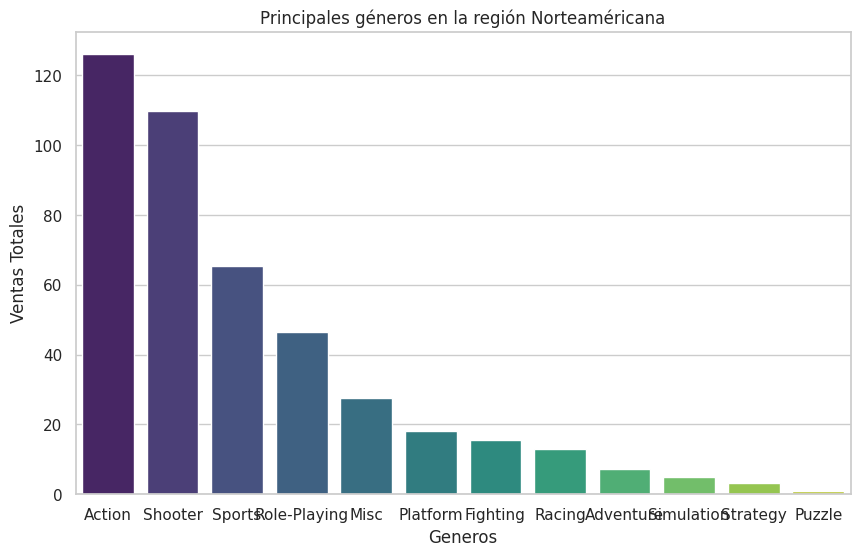

In [113]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='na_sales', data=na_genre_df, palette='viridis')
plt.title('Principales géneros en la región Norteaméricana')
plt.xlabel('Generos')
plt.ylabel('Ventas Totales')
plt.show()

In [114]:
na_rating_df = na_df.groupby('rating')['na_sales'].sum().reset_index()

In [115]:
na_rating_df

,rating,na_sales
0,E,79.05
1,E10+,54.24
2,M,165.21
3,T,49.79


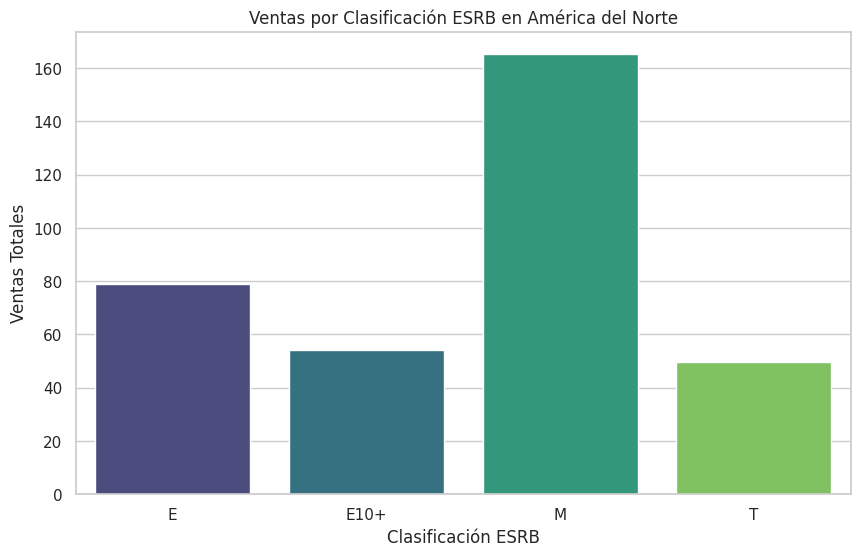

In [116]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='na_sales', data=na_rating_df, palette='viridis')
plt.title('Ventas por Clasificación ESRB en América del Norte')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales')
plt.show()





### Región Europea (EU)

In [117]:
eu_df = games_clean_df[['name','platform','year_of_release', 'genre','eu_sales', 'rating']]

In [118]:
eu_df

,name,platform,year_of_release,genre,eu_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,9.09,M
23,Grand Theft Auto V,X360,2013,Action,5.14,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,NaN
42,Grand Theft Auto V,PS4,2014,Action,6.31,M
...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN


In [119]:
eu_plataforma_df = eu_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [120]:
eu_plataforma_df

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.36
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


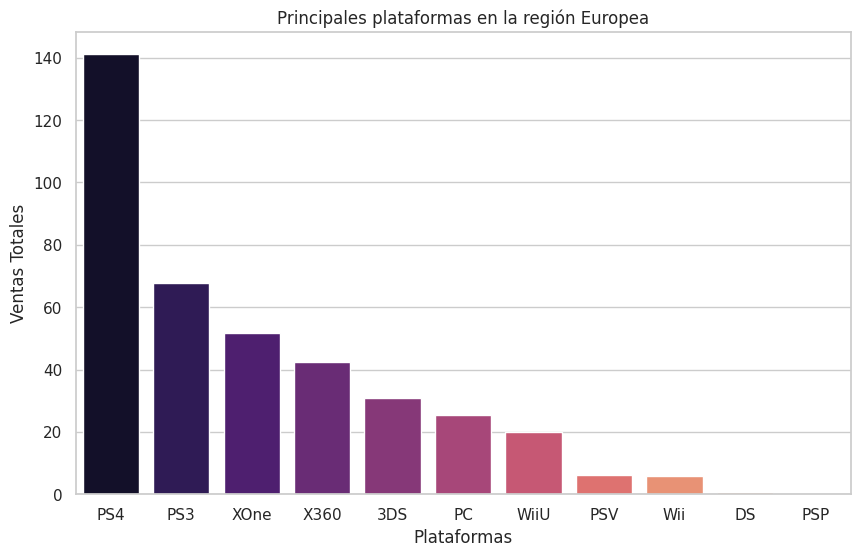

In [121]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='eu_sales', data=eu_plataforma_df, palette='magma')
plt.title('Principales plataformas en la región Europea')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales')
plt.show()

In [122]:
eu_genre_df = eu_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [123]:
eu_genre_df

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


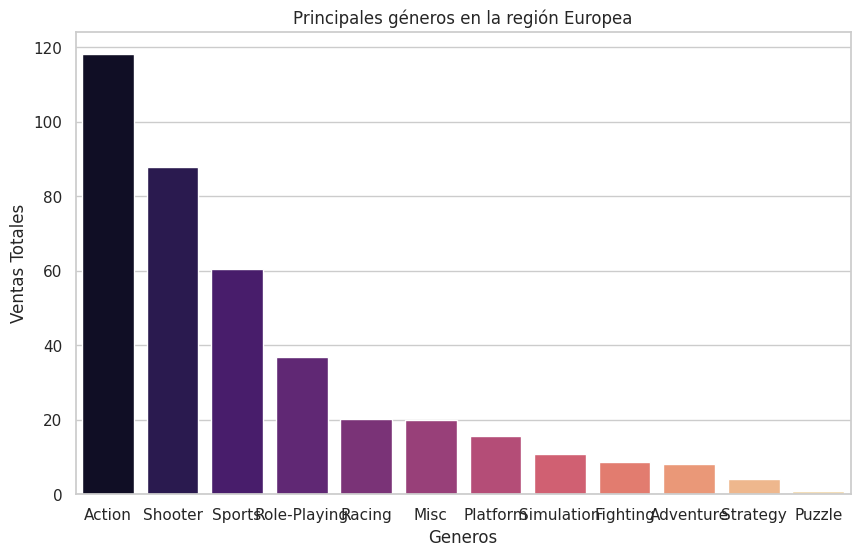

In [124]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='eu_sales', data=eu_genre_df, palette='magma')
plt.title('Principales géneros en la región Europea')
plt.xlabel('Generos')
plt.ylabel('Ventas Totales')
plt.show()

In [125]:
eu_rating_df = eu_df.groupby('rating')['eu_sales'].sum().reset_index()

In [126]:
eu_rating_df

,rating,eu_sales
0,E,83.36
1,E10+,42.69
2,M,145.32
3,T,41.95


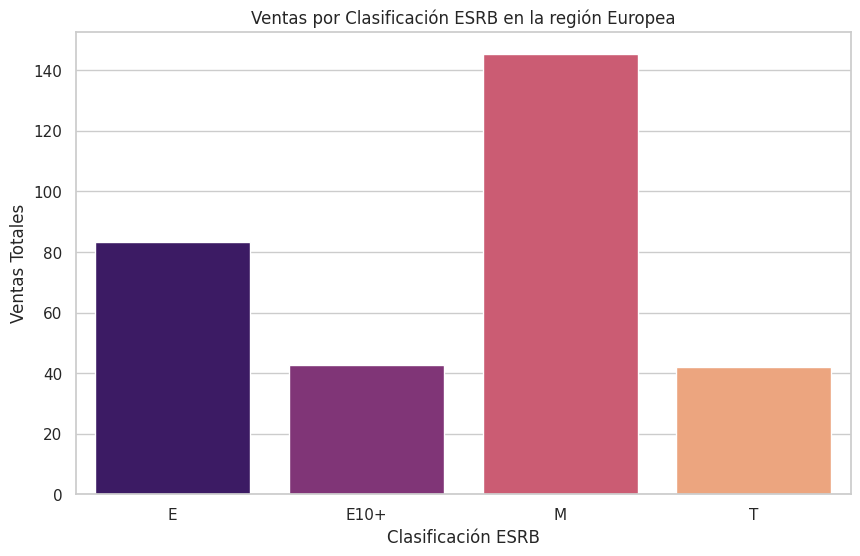

In [127]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='eu_sales', data=eu_rating_df, palette='magma')
plt.title('Ventas por Clasificación ESRB en la región Europea')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales')
plt.show()

### Región Japon (jp)

In [128]:
jp_df = games_clean_df[['name','platform','year_of_release', 'genre','jp_sales', 'rating']]

In [129]:
jp_df

,name,platform,year_of_release,genre,jp_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,M
23,Grand Theft Auto V,X360,2013,Action,0.06,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,NaN
42,Grand Theft Auto V,PS4,2014,Action,0.38,M
...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN


In [130]:
jp_plataforma_df = jp_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [131]:
jp_plataforma_df

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.29
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,DS,0.00


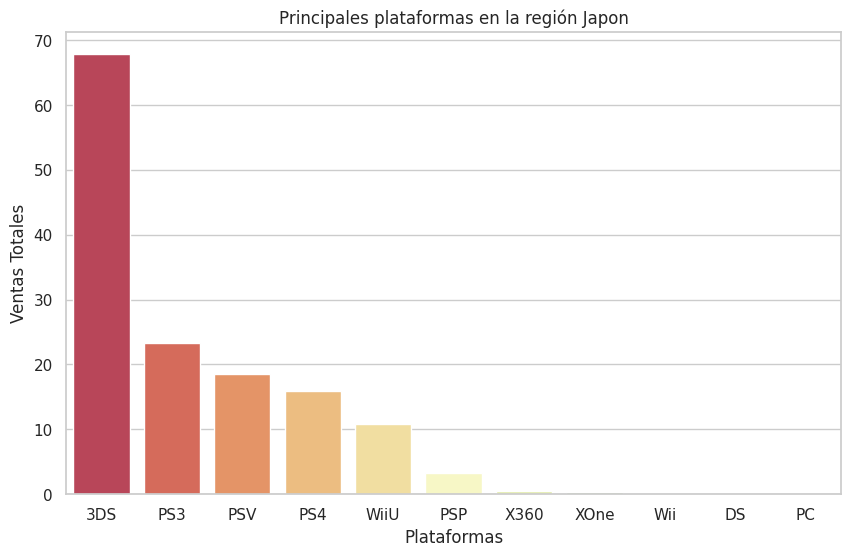

In [132]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='jp_sales', data=jp_plataforma_df, palette='Spectral')
plt.title('Principales plataformas en la región Japon')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales')
plt.show()

In [133]:
jp_genre_df = jp_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [134]:
jp_genre_df

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


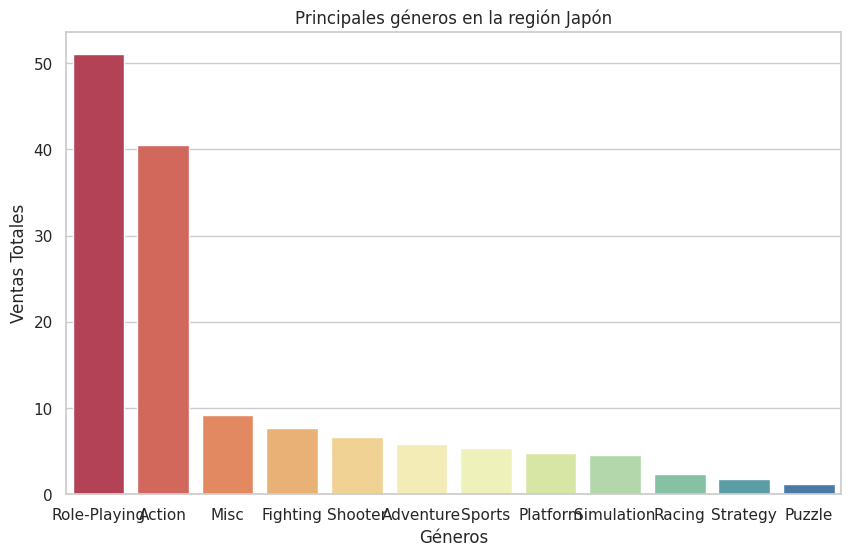

In [135]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='jp_sales', data=jp_genre_df, palette='Spectral')
plt.title('Principales géneros en la región Japón')
plt.xlabel('Géneros')
plt.ylabel('Ventas Totales')
plt.show()

In [136]:
jp_rating_df = jp_df.groupby('rating')['jp_sales'].sum().reset_index()

In [137]:
jp_rating_df

,rating,jp_sales
0,E,15.14
1,E10+,5.89
2,M,14.11
3,T,20.59


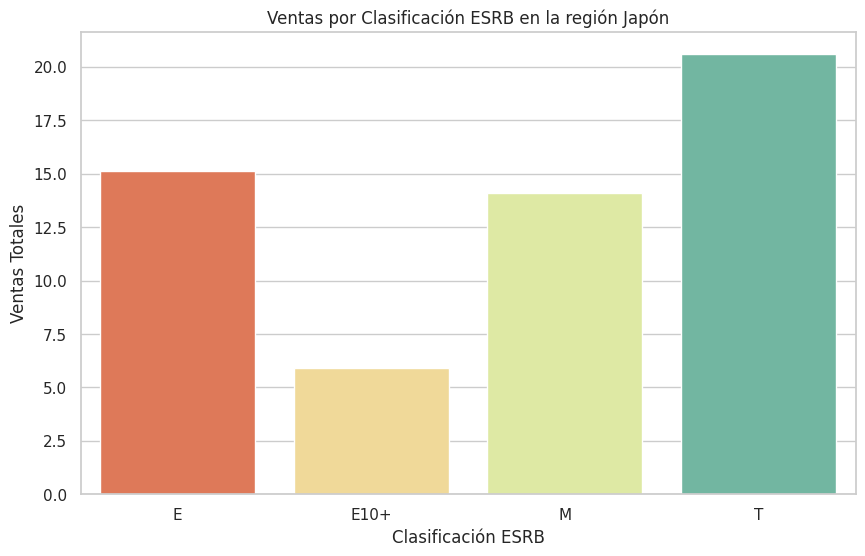

In [138]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='jp_sales', data=jp_rating_df, palette='Spectral')
plt.title('Ventas por Clasificación ESRB en la región Japón')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales')
plt.show()

## Comparaciones ## 

Es hora de ver las diferencias entre las tres regiones;

### Plataformas ###

Para la región Norteaméricana las plataformas principales son PS4, XOne, X360, PS3, 3DS, en ese orden. 
Para la región Europea el orden de las lataformas pricipales fueron PS4,PS3, XOne, X360, 3DS 
Podemos observar que las principales plataformas entre estas dos regionmes son muy similares, ya que coinciden en plataformas, auqne no en orden, pero es importante recalcar que su plataforma principal para ambas regiones es PS4 y la ultima plataforma en el top 5 es 3DS en ambos casos. 
En el caso de Japón las plataformas principales son 3DS , PS3, PSV, PS4 y WiiU, en Japón podemos encontrar grandes diferencias, para empezar la principal plataforma es 3DS, además de eso, hay dos nuevas plataformas figurando en el top 5, las cuales son WiiU y PSV, pero aquí no se encuentran las plataformas X, estas no parecen ser muy populares para esta región. 

Japón tiene otras preferencias en cuanto a las plataformas en comparación a la región Norteamérica y a la Europea. 

### Géneros ###

Los generos con mayor popularidad en la región Norteaméricana son Action,Shooter, Sports, Role-Playing y Misc, mientras que para la región de Europa son Action,Shooter, Sports, Role-Playing y	Racing, Son muy similares los gustos, unicamente cambia un genero y tiene el mismo orden de popularidad. 

Para Japón los generos con más popularidad son Role-Playing, Action, Misc, Fighting y Shooter, nuevamente la región de Japón tiene otras preferencias! 
Su genero preferido es Role-Playing y aunque Action y shooter se encuentran en la lista no esta en el mismo orden de popularidad que las otras regiones. Además podemos ver otro genero diferente el Fighting. 

### Clasificaciones ESRB ###

Aquí también podemos encontrar nuevamente diferencias entre regiones; mientras que en la región Norteamérica y Europa podemos observar que la clasificación M es la que contiene mayores ventas y los juegos con clasificaciones T son las que menos ventas tienen, en la región Japón es muy diferente ya que las clasificación T es la más vendida mientras que la E10+ tiene menos ventas .
Nuevamente Japón tiene diferentes números e intereses. 



## Prueba de hipotesis  <a id='Hipotesis'></a>

Se realizara una prueba t para dos muestras independientes. Esta prueba se usa para determinar si hay una diferencia significativa entre las medias de dos grupos independientes.

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC  son diferentes.

In [139]:
from scipy import stats as st

In [140]:
games_hipotesis_df = games_clean_df.dropna()

In [141]:
alpha = 0.05  
sample_1 =  games_hipotesis_df.query('platform == "XOne"')['user_score'] 

In [142]:
sample_1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16264    8.1
16314    3.1
16392    6.3
16597    6.0
16630    8.2
Name: user_score, Length: 159, dtype: float64

In [143]:
sample_2 =  games_hipotesis_df.query('platform == "PC"')['user_score'] 

In [144]:
sample_2

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16201    6.8
16280    7.3
16463    6.8
16509    7.9
16692    7.6
Name: user_score, Length: 133, dtype: float64

In [145]:
resultados = st.ttest_ind(sample_1,sample_2,equal_var=False)

print(f'p-value:{resultados.pvalue}')

p-value:0.14104275299383148


In [146]:
if resultados.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula')
else: 
    print('No podemos rechazar la hipotesis nula')

No podemos rechazar la hipotesis nula


H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [147]:
alpha = 0.05  
sample_3 =  games_hipotesis_df.query('genre == "Action"')['user_score']

In [148]:
sample_3

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16486    2.3
16530    5.5
16597    6.0
16652    8.5
16692    7.6
Name: user_score, Length: 301, dtype: float64

In [149]:
sample_4 = games_hipotesis_df.query('genre == "Sports"')['user_score']

In [150]:
sample_4

77       4.3
94       5.0
126      4.3
143      5.7
271      4.2
        ... 
14478    5.4
15407    3.7
15839    6.0
16120    6.3
16146    6.9
Name: user_score, Length: 106, dtype: float64

In [151]:
resultados_1 = st.ttest_ind(sample_3,sample_4,equal_var=False)

print(f'p-value:{resultados_1.pvalue}')

p-value:7.136312729062867e-13


In [152]:
if resultados_1.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula')
else: 
    print('No podemos rechazar la hipotesis nula')

Podemos rechazar la hipotesis nula


## Conclusiones <a id='conclusión'></a>

Se han detectado las platafomas y generos que más populares son y podemos saber a que lado de la moneda podemos apostarle. 
Se detectaron resultados que pueden generalizarse y tener buena ganancia, sin embargo para potencializarlo más, al hacer los análisis por región se logro entender el comportamiento de estas para evitar algunas perdidas. 

En algunas regiones coiciden generos, plataformas y rating, pero en otras no. No es que el número sea extraodinariamente alejado, pero al tratarse de negocios, el tener esto en cuenta evita gasto; 

Mientras que para Norteamérica y Europa, un juego de acción en xbox puede ser un gran lanzamiento, para Japón pasará desapercibido, ya que no tienen ventas significativas para esta plataforma y su género favorito no es de acción. De la misma manera un juego de Role_playing en 3DS puede ser un hit pero únicamente para Japón. 

Por lo que es importante considerar la región en la que se quiere sacar un juego. 